In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(pd.read_csv("/content/gemstone.csv"))

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [4]:
df.isnull().sum()

id         0
carat      1
cut        1
color      1
clarity    1
depth      1
table      1
x          1
y          1
z          1
price      1
dtype: int64

In [6]:
df.drop(columns= ['id'], inplace= True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,58877.0,0.791279,0.463881,0.20,0.4,0.70,1.03,3.40
depth,58877.0,61.818304,1.084110,52.10,61.3,61.90,62.40,69.90
table,58877.0,57.220901,1.922659,49.00,56.0,57.00,58.00,70.00
x,58877.0,5.715817,1.112293,3.77,4.7,5.71,6.51,9.43
y,58877.0,5.720659,1.105439,3.72,4.7,5.72,6.51,10.01
z,58877.0,3.534335,0.687662,0.00,2.9,3.53,4.03,8.18
price,58877.0,3980.485419,4048.582511,326.00,945.0,2409.00,5436.00,18818.00


In [8]:
df.duplicated().sum()

0

In [9]:
numerical_columns = df.columns[df.dtypes != "object"]
categorical_columns = df.columns[df.dtypes == 'object']
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
numerical_columns.dtype

dtype('O')

In [11]:
df[categorical_columns].describe()

,cut,color,clarity
count,58877,58877,58877
unique,5,7,8
top,Ideal,G,SI1
freq,28247,13505,16137


In [12]:
df["cut"].value_counts()

cut
Ideal        28247
Premium      15033
Very Good    11413
Good          3568
Fair           616
Name: count, dtype: int64

In [13]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [14]:
numerical_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

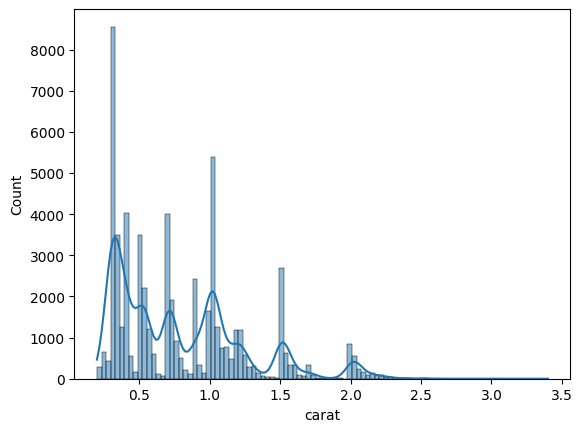

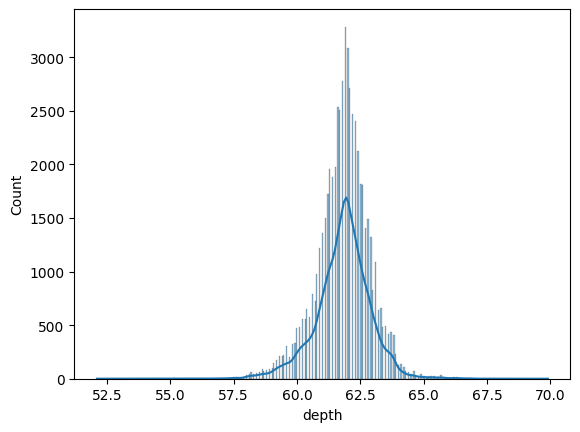

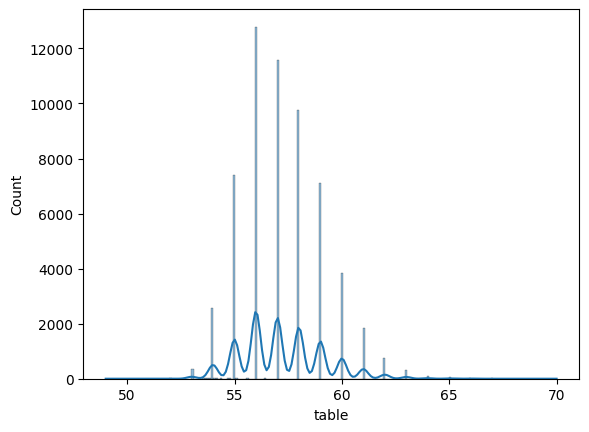

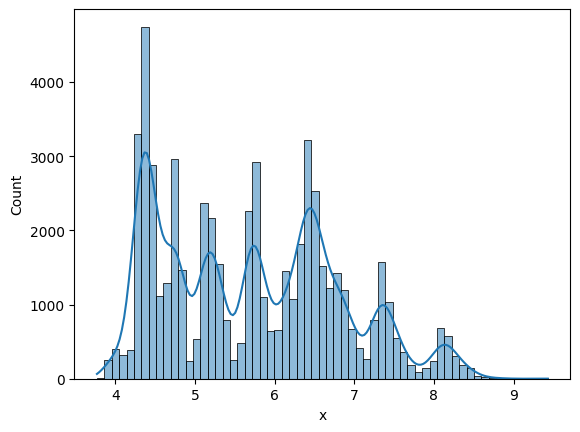

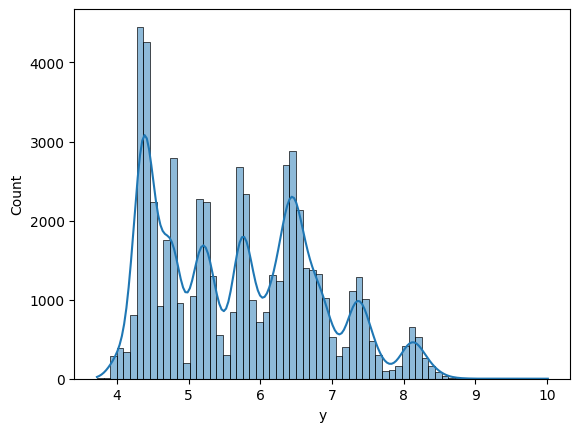

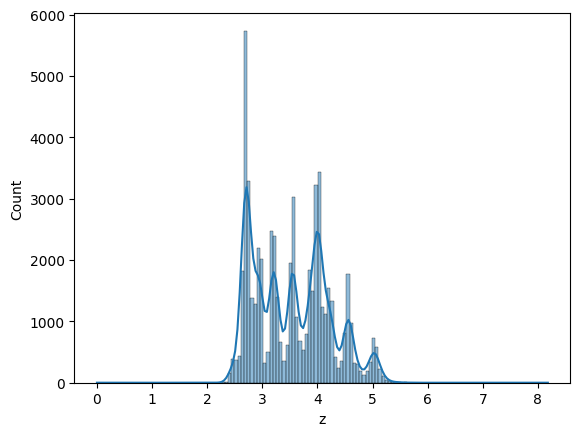

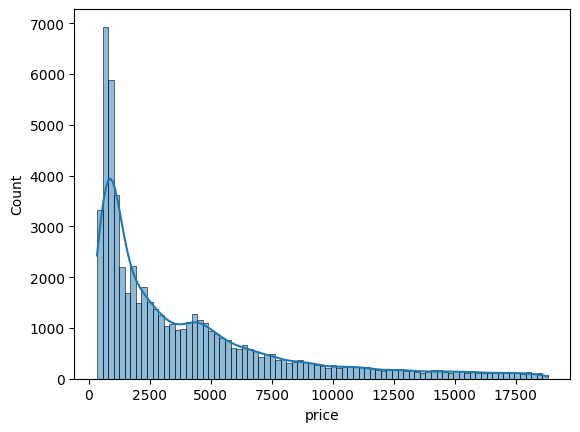

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
x = 1
for i in numerical_columns:
    sns.histplot(data = df, x = i, kde = True)
    print("\n")
    plt.show()

In [16]:

df["price"].value_counts()

price
544.0      182
789.0      149
552.0      146
605.0      138
698.0      135
          ... 
8855.0       1
7866.0       1
1322.0       1
4108.0       1
14799.0      1
Name: count, Length: 8263, dtype: int64

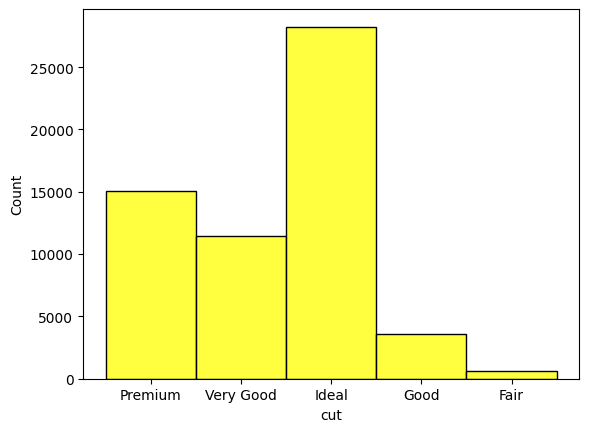

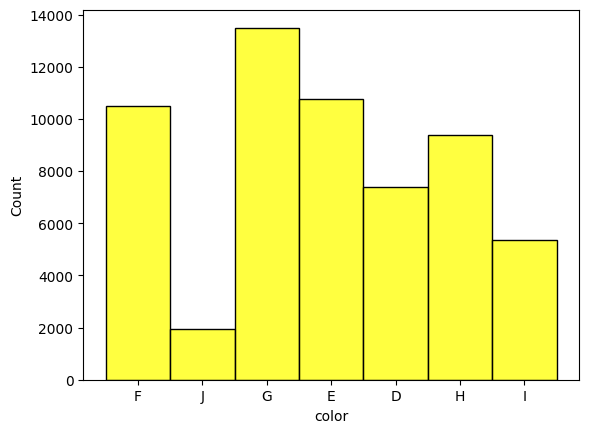

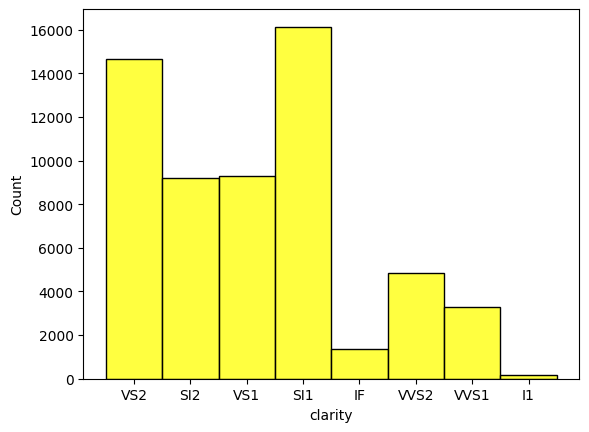

In [17]:
x = 1
for i in categorical_columns:
    sns.histplot(data = df, x = i, color= "Yellow")
    print("\n")
    plt.show()

In [18]:
df[numerical_columns].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.025478,0.227679,0.980821,0.980424,0.978959,0.943148
depth,0.025478,1.000000,-0.234818,-0.012064,-0.012985,0.080622,0.000964
table,0.227679,-0.234818,1.000000,0.238981,0.234782,0.214294,0.177576
x,0.980821,-0.012064,0.238981,1.000000,0.999207,0.994236,0.901032
y,0.980424,-0.012985,0.234782,0.999207,1.000000,0.994141,0.901073
z,0.978959,0.080622,0.214294,0.994236,0.994141,1.000000,0.897260
price,0.943148,0.000964,0.177576,0.901032,0.901073,0.897260,1.000000


<Axes: >

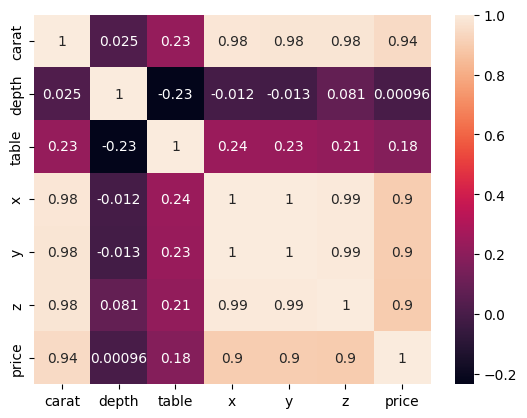

In [19]:
sns.heatmap(df[numerical_columns].corr(), annot=True)